In [11]:
import tensorflow as tf

In [12]:
from tensorflow.examples.tutorials.mnist import input_data

In [13]:
mnist=input_data.read_data_sets("/tmp/data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [15]:
sample=mnist.train.images[344].reshape(28,28)
import matplotlib.pyplot as plt
%matplotlib inline

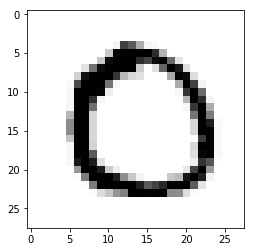

In [16]:
plt.imshow(sample,cmap="Greys")

In [17]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [18]:
n_classes=10
n_samples=mnist.train.num_examples

In [19]:
n_input=784

In [20]:
n_hidden_1=256
n_hidden_2=256

In [21]:
def multilayer_perceptron(x,weights,biases):
    layer_1=tf.add(tf.matmul(x,weights["h1"]),biases["b1"])
    layer_1=tf.nn.relu(layer_1)
    
    layer_2=tf.add(tf.matmul(layer_1,weights["h2"]),biases["b2"])
    layer_2=tf.nn.relu(layer_2)
    out_layer=tf.matmul(layer_2,weights["out"])+biases["out"]
    return out_layer
    

In [22]:
weights={
    "h1":tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    "h2":tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    "out":tf.Variable(tf.random_normal([n_hidden_2,n_classes])),
}

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
biases={
     "b1":tf.Variable(tf.random_normal([n_hidden_1])),
    "b2":tf.Variable(tf.random_normal([n_hidden_2])),
    "out":tf.Variable(tf.random_normal([n_classes])),
}

In [24]:
x=tf.placeholder("float",[None,n_input])

In [25]:
y=tf.placeholder("float",[None,n_classes])

In [26]:
pred=multilayer_perceptron(x,weights,biases)

In [27]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [28]:
sess=tf.InteractiveSession()

In [29]:
init=tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [30]:
sess.run(init)

In [31]:
for epoch in range(training_epochs):
    avg_cost=0.0
    total_batch=int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost+=c/total_batch
    print("Epoch: {} cost{:.4f}".format(epoch+1,avg_cost))
print(f"Model has completed {epoch+1} amount of training ")
        

Epoch: 1 cost167.5950
Epoch: 2 cost41.5976
Epoch: 3 cost25.9335
Epoch: 4 cost17.9351
Epoch: 5 cost13.0754
Epoch: 6 cost9.6781
Epoch: 7 cost7.1660
Epoch: 8 cost5.2357
Epoch: 9 cost4.0002
Epoch: 10 cost2.9608
Epoch: 11 cost2.1465
Epoch: 12 cost1.5313
Epoch: 13 cost1.1575
Epoch: 14 cost1.0080
Epoch: 15 cost0.8757
Model has completed 14 amount of training 


In [32]:
correct_predictions=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [33]:
correct_predictions=tf.cast(correct_predictions,"float")

In [34]:
accuracy=tf.reduce_mean(correct_predictions)

In [35]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9465